##Creating ArUco markers

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Augmented Reality using ArUco Markers

We are going to insert an image into a specific region of another image. This region is defined by an ArUco Marker.

Before adding the image, we must calculate the homography to insert it with the right perspective aspect.

The code for this example was based on:

https://www.learnopencv.com/augmented-reality-using-aruco-markers-in-opencv-c-python/

209   264     3


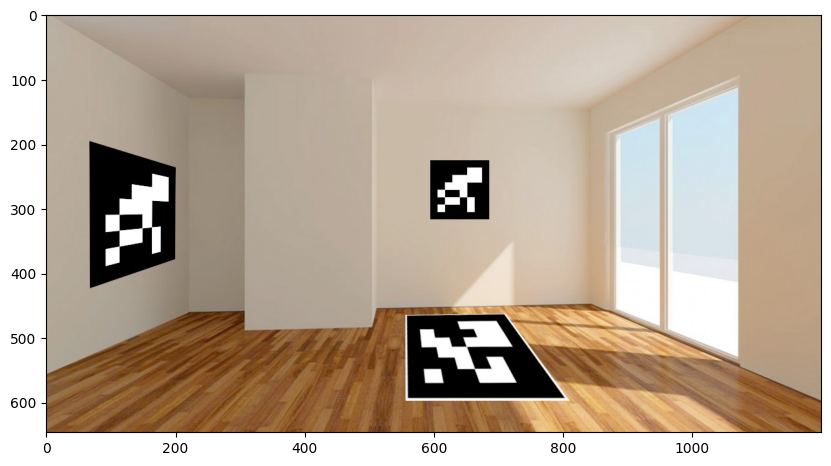

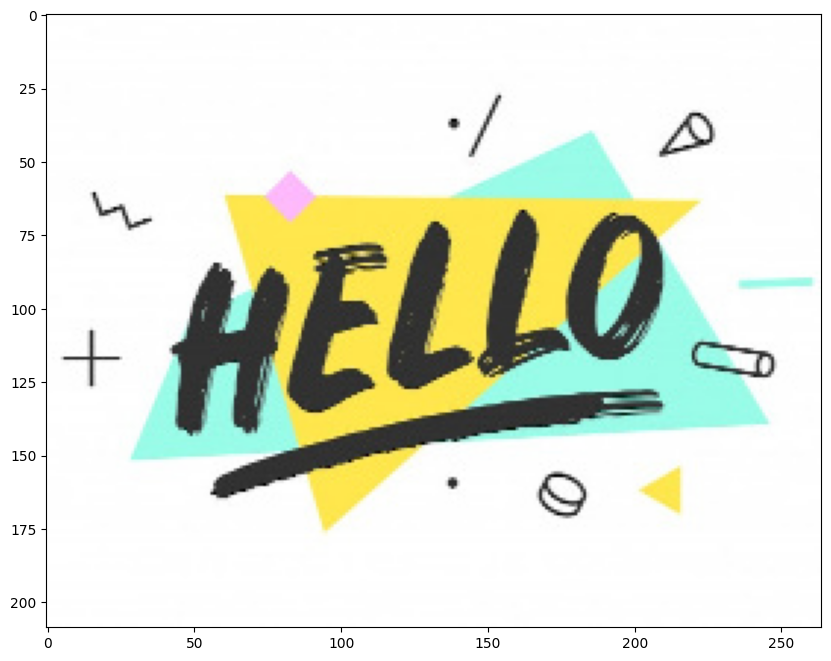

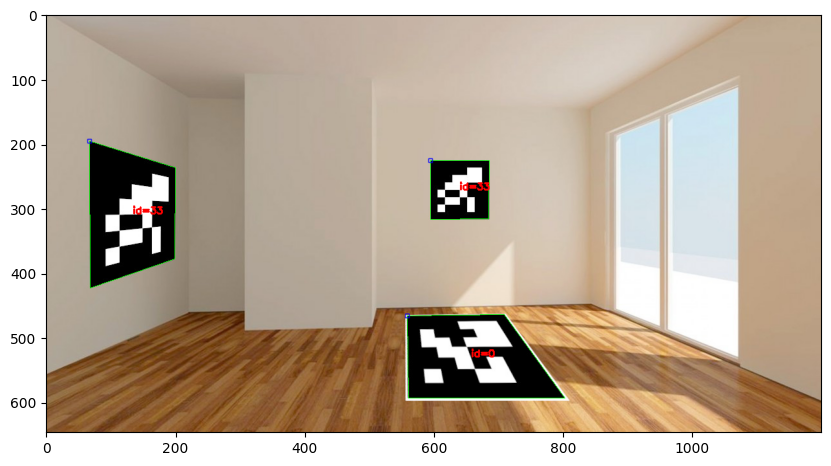

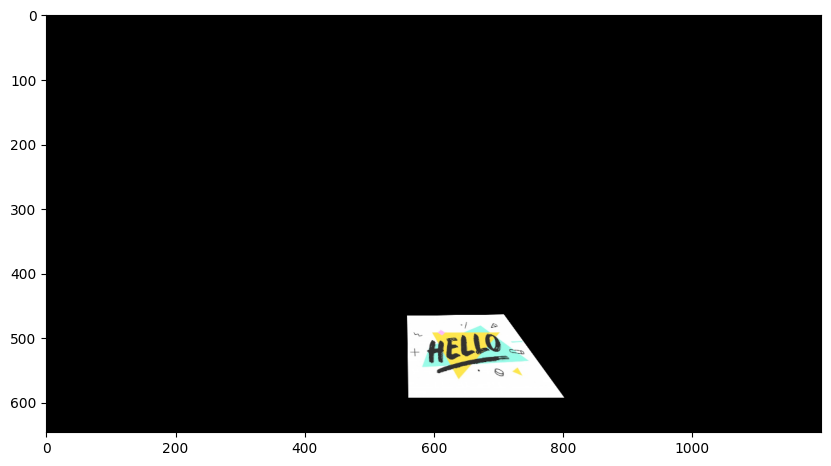

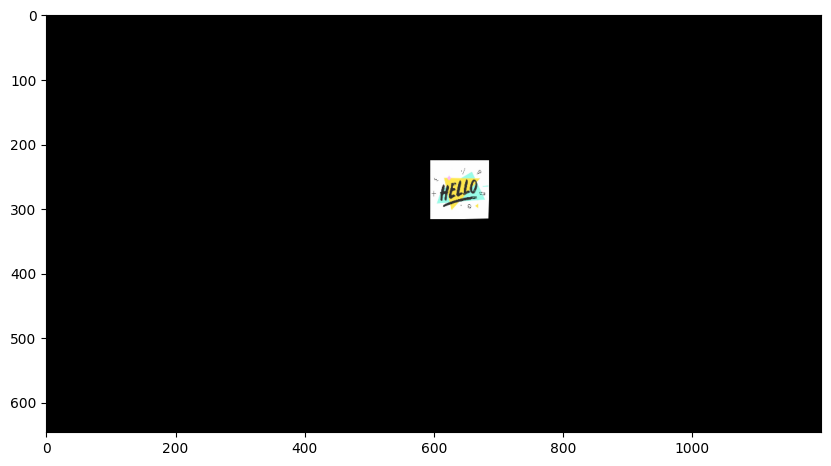

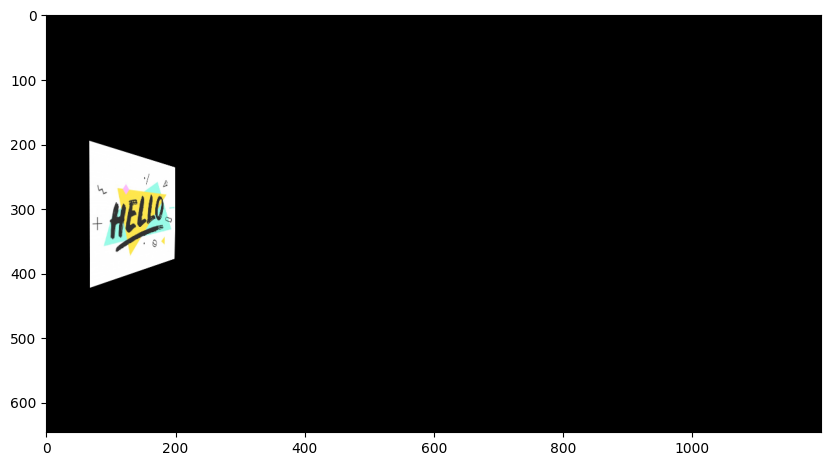

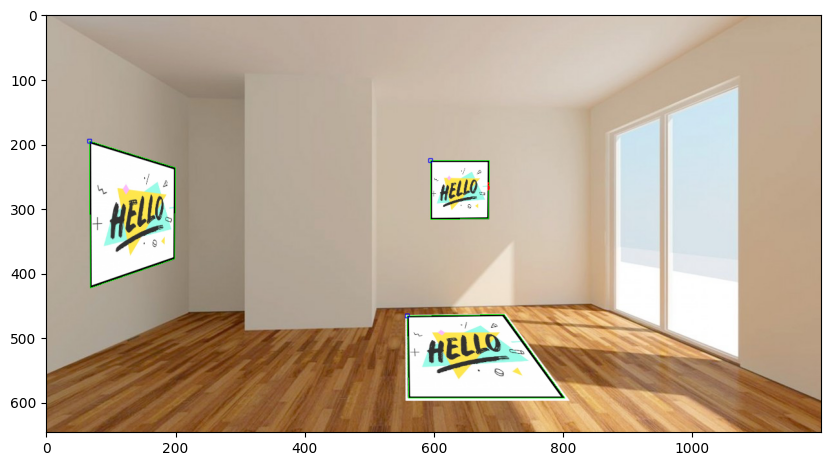

In [5]:
img01 = cv.imread('sala_com_aruco03.jpg')
img02 = cv.imread('hello.jpg')
img01_rgb = cv.cvtColor(img01, cv.COLOR_BGR2RGB)
img02_rgb = cv.cvtColor(img02, cv.COLOR_BGR2RGB)

plt.figure(figsize=[10,10])
plt.imshow(img01_rgb)
plt.figure(figsize=[10,10])
plt.imshow(img02_rgb)


#Load the dictionary that was used to generate the markers.
# Initialize the detector parameters using default values

parameters =  cv.aruco.DetectorParameters()
dictionary = cv.aruco.getPredefinedDictionary(cv.aruco.DICT_6X6_250)
arucoDetector = cv.aruco.ArucoDetector(dictionary, parameters)


# Detect the markers in the image
markerCorners, markerIds, rejectedCandidates = arucoDetector.detectMarkers(img01_rgb)

img01_corners = cv.aruco.drawDetectedMarkers(img01_rgb, markerCorners,markerIds)
plt.figure(figsize=[10,10])
plt.imshow(img01_corners)

# Get the limits of the image that will be inserted in the original one
[l,c,ch] = np.shape(img02_rgb)
print(l,' ',c,' ',' ',ch)

# Source points are the corners of the image that will be warped
pts_src = np.array([[0,0],[c,0],[c,l],[0,l]])

im_out = img01_rgb

for mark in markerCorners:

  # Define the source and destiny point for calculating the homography
  # Destiny points are the corners of the marker
  pts_dst = np.array(mark[0])

  #print(pts_dst)
  #print(pts_src)

  # Calculate Homography
  h, status = cv.findHomography(pts_src, pts_dst)

  # Warp source image to destination based on homography
  warped_image = cv.warpPerspective(img02_rgb, h, (img01_rgb.shape[1],img01_rgb.shape[0]))

  plt.figure(figsize=[10,10])
  plt.imshow(warped_image)

  # Prepare a mask representing region to copy from the warped image into the original frame.
  mask = np.zeros([img01_rgb.shape[0], img01_rgb.shape[1]], dtype=np.uint8)

  cv.fillConvexPoly(mask, np.int32([pts_dst]), (255, 255, 255), cv.LINE_AA)

  # Erode the mask to not copy the boundary effects from the warping
  element = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
  mask = cv.erode(mask, element, iterations=3)

  # Copy the mask into 3 channels.
  warped_image = warped_image.astype(float)
  mask3 = np.zeros_like(warped_image)

  for i in range(0, 3):

      mask3[:,:,i] = mask/255

  # Copy the masked warped image into the original frame in the mask region.

  warped_image_masked = cv.multiply(warped_image, mask3)
  frame_masked = cv.multiply(im_out.astype(float), 1-mask3)

  im_out = cv.add(warped_image_masked, frame_masked)




plt.figure(figsize=[10,10])
plt.imshow(im_out.astype(int))


